In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import cv2
import os
import seaborn as sns

In [3]:
PATH = r'../zasoby/shapes/'
IMG_SIZE = 64
shapes = ["circle", "square", "triangle", "star"]
labels = []
dataset = []

In [4]:
for shape in shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    for path in os.listdir(PATH + shape):
        #add the image to the list of images
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288)
        dataset.append(image)
        labels.append(shapes.index(shape))

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star


In [5]:
X = np.array(dataset)
X.shape

(14970, 12288)

In [6]:
index = np.random.randint(0, len(dataset)-1, size=5)

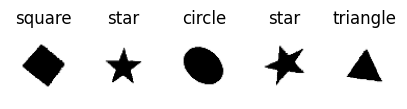

In [7]:
plt.figure(figsize=(5,7))
for i, ind in enumerate(index, 1):
    img = dataset[ind].reshape((64, 64, 3))
    lab = shapes[labels[ind]]
    plt.subplot(1,5,i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

In [9]:
perceptron = Perceptron(eta0=0.001, max_iter=100, shuffle=True, fit_intercept=True)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.001, max_iter=100)

In [10]:
perceptron.score(X_test, y_test)

0.9986639946559787

In [11]:
y_pred = perceptron.predict(X_test)
bad_results = [(a, b, c) for a, b, c in zip(X_test[y_test != y_pred], np.array(y_test)[y_test != y_pred], y_pred[y_test != y_pred])]

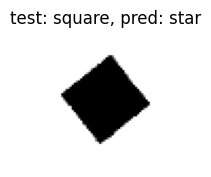

In [13]:
number = 1
plt.figure(figsize=(8,4))

for img, test, pred in bad_results:
    plt.subplot(1, len(bad_results), number)   
    plt.axis('off')
    plt.title(f"test: {shapes[test]}, pred: {shapes[pred]}")
    plt.imshow(img.reshape(64,64,3))